In [10]:
#copied from hmmlearn examples # 2

"""
Gaussian HMM of stock data
--------------------------
This script shows how to use Gaussian HMM on stock price data from
Yahoo! finance. For more information on how to visualize stock prices
with matplotlib, please refer to ``date_demo1.py`` of matplotlib.
"""

%matplotlib inline
import matplotlib.pylab
from __future__ import print_function
import datetime
import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
try:
    from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
    # For Matplotlib prior to 1.5.
    from matplotlib.finance import (
        quotes_historical_yahoo as quotes_historical_yahoo_ochl
    )

from hmmlearn.hmm import GaussianHMM

fitting to HMM and decoding ...done
Transition matrix
[[  7.23125914e-01   3.29953777e-03   5.41436789e-14   2.13366225e-02
    1.59399911e-01   9.28380147e-02]
 [  7.72720136e-10   9.77620425e-01   1.96262649e-02   4.21764659e-23
    2.75330920e-03   2.10085949e-11]
 [  4.25222436e-35   2.65928508e-01   3.98912518e-01   3.35157630e-01
    1.34422628e-06   2.41025502e-50]
 [  6.15610777e-02   1.04179137e-22   2.46653240e-02   5.68048506e-01
    3.40385403e-01   5.33968932e-03]
 [  2.14587835e-01   6.44389723e-11   5.55931343e-03   1.42999802e-01
    6.11749522e-01   2.51035281e-02]
 [  1.55718915e-01   2.85659700e-28   1.03136904e-03   2.65970920e-02
    9.50918722e-02   7.21560752e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [  1.15155695e-02   5.53747107e+07]
var =  [  6.65037036e-02   6.85682368e+13]

1th hidden state
mean =  [  2.54583222e-02   4.96519286e+07]
var =  [  7.87245071e-01   2.49651238e+14]

2th hidden state
mean =  [ -7.63620019e-01   1.54575623e

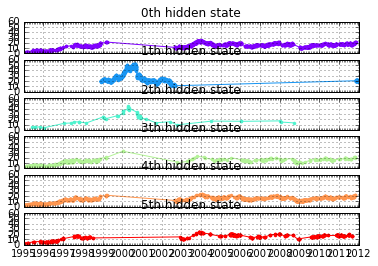

In [9]:
# Get quotes from Yahoo! finance
quotes = quotes_historical_yahoo_ochl(
    "INTC", datetime.date(1995, 1, 1), datetime.date(2012, 1, 6))

# Unpack quotes
dates = np.array([q[0] for q in quotes], dtype=int)
close_v = np.array([q[2] for q in quotes])
volume = np.array([q[5] for q in quotes])[1:]

# Take diff of close value. Note that this makes
# ``len(diff) = len(close_t) - 1``, therefore, other quantities also
# need to be shifted by 1.
diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]

# Pack diff and volume for training.
X = np.column_stack([diff, volume])

###############################################################################
# Run Gaussian HMM
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=6, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

###############################################################################
# Print trained parameters and plot
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()